# Introducción a la librería DEAP

![](https://deap.readthedocs.io/en/master/_images/deap_long.png)

- Fortin, F. A., De Rainville, F. M., Gardner, M. A. G., Parizeau, M., & Gagné, C. (2012). DEAP: Evolutionary algorithms made easy. The Journal of Machine Learning Research, 13(1), 2171-2175. (https://www.jmlr.org/papers/volume13/fortin12a/fortin12a.pdf)

- Documentación: https://deap.readthedocs.io/en/master/

- Repositorio: https://github.com/deap/deap

| Virtudes de DEAP | Descripción |
| --- | --- |
| Flexibilidad | DEAP está diseñado para ser muy flexible, permitiendo personalizar muchos aspectos de los algoritmos genéticos y evolutivos, desde la representación de los individuos hasta los operadores de mutación y cruce. |
| Simplicidad | DEAP proporciona una interfaz de usuario sencilla y fácil de usar. Los usuarios pueden crear, evolucionar y analizar poblaciones con solo unas pocas líneas de código. |
| Paralelización | DEAP incluye soporte para la ejecución paralela de algoritmos genéticos y evolutivos. Esto puede mejorar significativamente el rendimiento de estos algoritmos en problemas grandes y/o difíciles. |
| Documentación | DEAP tiene una documentación detallada y una comunidad activa, lo que facilita el aprendizaje y la solución de problemas. |
| Diversidad de algoritmos | DEAP proporciona una variedad de algoritmos genéticos y evolutivos, incluyendo algoritmos genéticos sencillos, algoritmos genéticos con elitismo, algoritmos genéticos con restricciones, algoritmos de estrategias evolutivas, algoritmos de programación genética, y más. |
| Evaluación multiobjetivo | DEAP incluye soporte para la evaluación y optimización multiobjetivo, que es útil en problemas donde hay varios objetivos en conflicto que deben ser optimizados simultáneamente. |


Libro Hands-On Genetic Algorithms with Python: https://github.com/PacktPublishing/Hands-On-Genetic-Algorithms-with-Python


#### Explorar documentación

In [1]:
# !pip install deap

Defaulting to user installation because normal site-packages is not writeable


In [1]:
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import random
import numpy

import matplotlib.pyplot as plt
import seaborn as sns
import PIL
import urllib

## Definiendo métodos y clases que se usarán más adelante

In [2]:
# This is the original elitism module.
def elitism(population, toolbox, cxpb, mutpb, ngen, stats=None,
             halloffame=None, verbose=__debug__):
    """This algorithm is similar to DEAP eaSimple() algorithm, with the modification that
    halloffame is used to implement an elitism mechanism. The individuals contained in the
    halloffame are directly injected into the next generation and are not subject to the
    genetic operators of selection, crossover and mutation.
    """
    logbook = tools.Logbook()
    logbook.header = ['gen', 'nevals'] + (stats.fields if stats else [])

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in population if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    if halloffame is None:
        raise ValueError("halloffame parameter must not be empty!")

    halloffame.update(population)
    hof_size = len(halloffame.items) if halloffame.items else 0

    record = stats.compile(population) if stats else {}
    logbook.record(gen=0, nevals=len(invalid_ind), **record)
    if verbose:
        print(logbook.stream)

    # Begin the generational process
    for gen in range(1, ngen + 1):

        # Select the next generation individuals
        offspring = toolbox.select(population, len(population) - hof_size)

        # Vary the pool of individuals
        offspring = algorithms.varAnd(offspring, toolbox, cxpb, mutpb)

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # add the best back to population:
        offspring.extend(halloffame.items)

        # Update the hall of fame with the generated individuals
        halloffame.update(offspring)

        # Replace the current population by the offspring
        population[:] = offspring

        # Append the current generation statistics to the logbook
        record = stats.compile(population) if stats else {}
        logbook.record(gen=gen, nevals=len(invalid_ind), **record)
        if verbose:
            print(logbook.stream)

    return population, logbook


In [4]:
class Knapsack01Problem:
    """This class encapsulates the Knapsack 0-1 Problem from RosettaCode.org
    """

    def __init__(self, maxcapacity=400):

        # initialize instance variables:
        self.items = []
        self.maxCapacity = maxcapacity

        # initialize the data:
        self.__initData()

    def __len__(self):
        """
        :return: the total number of items defined in the problem
        """
        return len(self.items)

    def __initData(self):
        """initializes the RosettaCode.org knapsack 0-1 problem data
        """
        self.items = [
            ("map", 9, 150),
            ("compass", 13, 35),
            ("water", 153, 200),
            ("sandwich", 50, 160),
            ("glucose", 15, 60),
            ("tin", 68, 45),
            ("banana", 27, 60),
            ("apple", 39, 40),
            ("cheese", 23, 30),
            ("beer", 52, 10),
            ("suntan cream", 11, 70),
            ("camera", 32, 30),
            ("t-shirt", 24, 15),
            ("trousers", 48, 10),
            ("umbrella", 73, 40),
            ("waterproof trousers", 42, 70),
            ("waterproof overclothes", 43, 75),
            ("note-case", 22, 80),
            ("sunglasses", 7, 20),
            ("towel", 18, 12),
            ("socks", 4, 50),
            ("book", 30, 10)
        ]

        self.maxCapacity = self.maxCapacity

    def getValue(self, zeroOneList):
        """
        Calculates the value of the selected items in the list, while ignoring items that will cause the accumulating weight to exceed the maximum weight
        :param zeroOneList: a list of 0/1 values corresponding to the list of the problem's items. '1' means that item was selected.
        :return: the calculated value
        """

        totalWeight = totalValue = 0

        for i in range(len(zeroOneList)):
            item, weight, value = self.items[i]
            if totalWeight + weight <= self.maxCapacity:
                totalWeight += zeroOneList[i] * weight
                totalValue += zeroOneList[i] * value
        return totalValue

    def printItems(self, zeroOneList):
        """
        Prints the selected items in the list, while ignoring items that will cause the accumulating weight to exceed the maximum weight
        :param zeroOneList: a list of 0/1 values corresponding to the list of the problem's items. '1' means that item was selected.
        """
        totalWeight = totalValue = 0

        for i in range(len(zeroOneList)):
            item, weight, value = self.items[i]
            if totalWeight + weight <= self.maxCapacity:
                if zeroOneList[i] > 0:
                    totalWeight += weight
                    totalValue += value
                    print("- Adding {}: weight = {}, value = {}, accumulated weight = {}, accumulated value = {}".format(item, weight, value, totalWeight, totalValue))
        print("- Total weight = {}, Total value = {}".format(totalWeight, totalValue))

In [5]:
class NQueensProblem:
    """This class encapsulates the N-Queens problem
    """

    def __init__(self, numOfQueens):
        """
        :param numOfQueens: the number of queens in the problem
        """
        self.numOfQueens = numOfQueens

    def __len__(self):
        """
        :return: the number of queens
        """
        return self.numOfQueens

    def getViolationsCount(self, positions):
        """
        Calculates the number of violations in the given solution
        Since the input contains unique indices of columns for each row, no row or column violations are possible,
        Only the diagonal violations need to be counted.
        :param positions: a list of indices corresponding to the positions of the queens in each row
        :return: the calculated value
        """

        if len(positions) != self.numOfQueens:
            raise ValueError("size of positions list should be equal to ", self.numOfQueens)

        violations = 0

        # iterate over every pair of queens and find if they are on the same diagonal:
        for i in range(len(positions)):
            for j in range(i + 1, len(positions)):

                # first queen in pair:
                column1 = i
                row1 = positions[i]

                # second queen in pair:
                column2 = j
                row2 = positions[j]

                # look for diagonal threat for th ecurrent pair:
                if abs(column1 - column2) == abs(row1 - row2):
                    violations += 1

        return violations

    def plotBoard(self, positions):
        """
        Plots the positions of the queens on the board according to the given solution
        :param positions: a list of indices corresponding to the positions of the queens in each row.
        """

        if len(positions) != self.numOfQueens:
            raise ValueError("size of positions list should be equal to ", self.numOfQueens)

        fig, ax = plt.subplots()

        # start with the board's squares:
        board = np.zeros((self.numOfQueens, self.numOfQueens))
        # change color of every other square:
        board[::2, 1::2] = 1
        board[1::2, ::2] = 1

        # draw the squares with two different colors:
        ax.imshow(board, interpolation='none', cmap=mpl.colors.ListedColormap(['#ffc794', '#4c2f27']))

        # read the queen image thumbnail and give it a spread of 70% of the square dimensions:
        urlimg = 'https://raw.githubusercontent.com/PacktPublishing/Hands-On-Genetic-Algorithms-with-Python/master/Chapter05/queen-thumbnail.png'
#         queenThumbnail = plt.imread()
        queenThumbnail = np.array(PIL.Image.open(urllib.request.urlopen(urlimg)))
        thumbnailSpread = 0.70 * np.array([-1, 1, -1, 1]) / 2  # spread is [left, right, bottom, top]

        # iterate over the queen positions - i is the row, j is the column:
        for i, j in enumerate(positions):
            # place the thumbnail on the matching square:
            ax.imshow(queenThumbnail, extent=[j, j, i, i] + thumbnailSpread)

        # show the row and column indexes:
        ax.set(xticks=list(range(self.numOfQueens)), yticks=list(range(self.numOfQueens)))

        ax.axis('image')   # scale the plot as square-shaped

        return plt


## The OneMax problem

gen	nevals	max	avg  
0  	100   	61 	50.16
1  	87    	64 	53.81
2  	97    	67 	56.82
3  	89    	67 	60.13
4  	91    	69 	62.61
5  	94    	71 	65.13
6  	93    	72 	67.16
7  	83    	74 	68.91
8  	87    	75 	70.61
9  	88    	77 	72.35
10 	84    	81 	74.03
11 	87    	82 	75.69
12 	92    	83 	77.56
13 	94    	83 	79.42
14 	96    	87 	81.05
15 	94    	87 	82.7 
16 	94    	87 	84.11
17 	93    	87 	85.09
18 	80    	88 	85.77
19 	92    	88 	86.42
20 	94    	88 	87.03


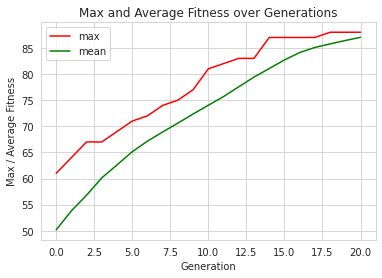

In [265]:
# problem constants:
ONE_MAX_LENGTH = 100  # length of bit string to be optimized

# Genetic Algorithm constants:
POPULATION_SIZE = 100
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.1   # probability for mutating an individual
MAX_GENERATIONS = 20


# set the random seed:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

toolbox = base.Toolbox()

# create an operator that randomly returns 0 or 1:
toolbox.register("zeroOrOne", random.randint, 0, 1)

# define a single objective, maximizing fitness strategy:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMax)

# create the individual operator to fill up an Individual instance:
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, ONE_MAX_LENGTH)

# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)


# fitness calculation:
# compute the number of '1's in the individual
def oneMaxFitness(individual):
    return sum(individual),  # return a tuple


toolbox.register("evaluate", oneMaxFitness)

# genetic operators:mutFlipBit

# Tournament selection with tournament size of 3:
toolbox.register("select", tools.selTournament, tournsize=3)

# Single-point crossover:
toolbox.register("mate", tools.cxOnePoint)

# Flip-bit mutation:
# indpb: Independent probability for each attribute to be flipped
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/ONE_MAX_LENGTH)


# Genetic Algorithm flow:
def main():

    # create initial population (generation 0):
    population = toolbox.populationCreator(n=POPULATION_SIZE)

    # prepare the statistics object:
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("max", numpy.max)
    stats.register("avg", numpy.mean)

    # perform the Genetic Algorithm flow:
    population, logbook = algorithms.eaSimple(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION, ngen=MAX_GENERATIONS,
                                   stats=stats, verbose=True)


    # Genetic Algorithm is done - extract statistics:
    maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")

    # plot statistics:
    sns.set_style("whitegrid")
    plt.plot(maxFitnessValues, color='red', label='max')
    plt.plot(meanFitnessValues, color='green', label='mean')
    plt.xlabel('Generation')
    plt.ylabel('Max / Average Fitness')
    plt.title('Max and Average Fitness over Generations')
    plt.legend()
    plt.show()


if __name__ == "__main__":
    main()

## Hall of fame (salón de la fama)

gen	nevals	max	avg  
0  	100   	61 	50.16
1  	87    	64 	53.81
2  	97    	67 	56.82
3  	89    	67 	60.13
4  	91    	69 	62.61
5  	94    	71 	65.13
6  	93    	72 	67.16
7  	83    	74 	68.91
8  	87    	75 	70.61
9  	88    	77 	72.35
10 	84    	81 	74.03
11 	87    	82 	75.69
12 	92    	83 	77.56
13 	94    	83 	79.42
14 	96    	87 	81.05
15 	94    	87 	82.7 
16 	94    	87 	84.11
17 	93    	87 	85.09
18 	80    	88 	85.77
19 	92    	88 	86.42
20 	94    	88 	87.03
Hall of Fame Individuals = 
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1

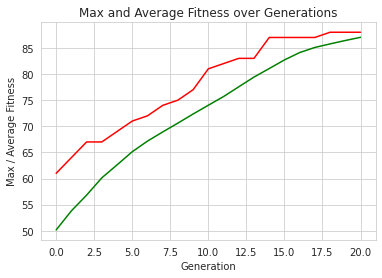

In [18]:
# problem constants:
ONE_MAX_LENGTH = 100  # length of bit string to be optimized

# Genetic Algorithm constants:
POPULATION_SIZE = 100
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.1   # probability for mutating an individual
MAX_GENERATIONS = 20
HALL_OF_FAME_SIZE = 10


# set the random seed:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

toolbox = base.Toolbox()

# create an operator that randomly returns 0 or 1:
toolbox.register("zeroOrOne", random.randint, 0, 1)

# define a single objective, maximizing fitness strategy:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMax)

# create the individual operator to fill up an Individual instance:
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, ONE_MAX_LENGTH)

# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)


# fitness calculation:
# compute the number of '1's in the individual
def oneMaxFitness(individual):
    return sum(individual),  # return a tuple


toolbox.register("evaluate", oneMaxFitness)

# genetic operators:mutFlipBit

# Tournament selection with tournament size of 3:
toolbox.register("select", tools.selTournament, tournsize=3)

# Single-point crossover:
toolbox.register("mate", tools.cxOnePoint)

# Flip-bit mutation:
# indpb: Independent probability for each attribute to be flipped
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/ONE_MAX_LENGTH)


# Genetic Algorithm flow:
def main():

    # create initial population (generation 0):
    population = toolbox.populationCreator(n=POPULATION_SIZE)

    # prepare the statistics object:
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("max", numpy.max)
    stats.register("avg", numpy.mean)

    # define the hall-of-fame object:
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    # perform the Genetic Algorithm flow with hof feature added:
    population, logbook = algorithms.eaSimple(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                              ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)

    # print Hall of Fame info:
    print("Hall of Fame Individuals = ", *hof.items, sep="\n")
    print("Best Ever Individual = ", hof.items[0])

    # extract statistics:
    maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")

    # plot statistics:
    sns.set_style("whitegrid")
    plt.plot(maxFitnessValues, color='red')
    plt.plot(meanFitnessValues, color='green')
    plt.xlabel('Generation')
    plt.ylabel('Max / Average Fitness')
    plt.title('Max and Average Fitness over Generations')

    plt.show()


if __name__ == "__main__":
    main()

## Mochila

![](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Knapsack.svg/375px-Knapsack.svg.png)

gen	nevals	max	avg  
0  	20    	810	568.7
1  	16    	887	715.55
2  	18    	937	781.6 
3  	16    	972	854.95
4  	14    	1040	921   
5  	16    	1040	968.5 
6  	16    	1012	991.7 
7  	18    	1012	991.2 
8  	16    	1040	1003.4
9  	13    	1040	1009.85
10 	16    	1040	1023.3 
11 	18    	1040	1029.5 
12 	14    	1040	1038.4 
13 	14    	1040	1040   
14 	18    	1040	1028.35
15 	18    	1040	1040   
16 	12    	1040	1040   
17 	18    	1040	1040   
18 	16    	1040	1037.5 
19 	16    	1040	1036.6 
20 	16    	1040	1040   
21 	18    	1040	1035.1 
22 	18    	1040	1040   
23 	18    	1040	1040   
24 	16    	1040	1040   
25 	18    	1040	1040   
26 	19    	1040	1033.6 
27 	17    	1040	1040   
28 	17    	1040	1031.6 
29 	19    	1040	1031.6 
30 	16    	1040	1040   
31 	14    	1040	1039.6 
32 	14    	1040	1040   
33 	13    	1040	1040   
34 	18    	1040	1040   
35 	18    	1040	1033.5 
36 	16    	1040	1040   
37 	18    	1040	1040   
38 	16    	1040	1035.6 
39 	11    	1040	1040   
40 	18    	1040	1040   
41 	19   

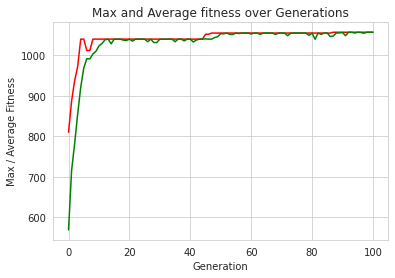

In [44]:
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

import random
import numpy

import matplotlib.pyplot as plt
import seaborn as sns

# import knapsack

# problem constants:
# create the knapsack problem instance to be used:
knapsack = Knapsack01Problem(maxcapacity=500)

# Genetic Algorithm constants:
POPULATION_SIZE = 20
P_CROSSOVER = 0.8 # probability for crossover
P_MUTATION = 0.05 # probability for mutating an individual
MAX_GENERATIONS = 100
HALL_OF_FAME_SIZE = 1


# set the random seed:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

toolbox = base.Toolbox()

# create an operator that randomly returns 0 or 1:
toolbox.register("zeroOrOne", random.randint, 0, 1)

# define a single objective, maximizing fitness strategy:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMax)

# create the individual operator to fill up an Individual instance:
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, len(knapsack))

# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)


# fitness calculation
def knapsackValue(individual):
    return knapsack.getValue(individual),  # return a tuple


toolbox.register("evaluate", knapsackValue)

# genetic operators:mutFlipBit

# Tournament selection with tournament size of 3:
toolbox.register("select", tools.selTournament, tournsize=3)

# Single-point crossover:
toolbox.register("mate", tools.cxTwoPoint)

# Flip-bit mutation:
# indpb: Independent probability for each attribute to be flipped
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/len(knapsack))


# Genetic Algorithm flow:
def main():

    # create initial population (generation 0):
    population = toolbox.populationCreator(n=POPULATION_SIZE)

    # prepare the statistics object:
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("max", numpy.max)
    stats.register("avg", numpy.mean)

    # define the hall-of-fame object:
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    # perform the Genetic Algorithm flow with hof feature added:
    population, logbook = algorithms.eaSimple(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                              ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)

    # print best solution found:
    best = hof.items[0]
    print("-- Best Ever Individual = ", best)
    print("-- Best Ever Fitness = ", best.fitness.values[0])

    print("-- Knapsack Items = ")
    knapsack.printItems(best)

    # extract statistics:
    maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")

    # plot statistics:
    sns.set_style("whitegrid")
    plt.plot(maxFitnessValues, color='red')
    plt.plot(meanFitnessValues, color='green')
    plt.xlabel('Generation')
    plt.ylabel('Max / Average Fitness')
    plt.title('Max and Average fitness over Generations')
    plt.show()


if __name__ == "__main__":
    main()

### Ejercicio: Experimentar numéricamente con los hiperparámetros.

## 8 reinas
![](https://codeahoy.com/img/books/recursion/n-queen-problem.png)

Violación:
![](https://raw.githubusercontent.com/igomezv/ComputoEvolutivo/main/img/8damas_viol.png)

gen	nevals	min	avg 
0  	100   	1  	4.76
1  	70    	1  	3.82
2  	74    	1  	3.31
3  	77    	1  	3.25
4  	77    	1  	3.44
5  	78    	1  	3.68
6  	73    	0  	3.12
7  	82    	0  	3.47
8  	77    	0  	3.06
9  	76    	0  	2.61
10 	72    	0  	2.13
- Best solutions are:
0 :  0.0  ->  Individual('i', [5, 7, 1, 3, 0, 6, 4, 2])
1 :  0.0  ->  Individual('i', [2, 4, 1, 7, 0, 6, 3, 5])
2 :  0.0  ->  Individual('i', [6, 1, 3, 0, 7, 4, 2, 5])
3 :  0.0  ->  Individual('i', [2, 4, 7, 3, 0, 6, 1, 5])
4 :  1.0  ->  Individual('i', [5, 1, 4, 7, 0, 6, 3, 2])
5 :  1.0  ->  Individual('i', [2, 6, 3, 1, 7, 4, 0, 5])
6 :  1.0  ->  Individual('i', [6, 3, 1, 4, 7, 5, 0, 2])
7 :  1.0  ->  Individual('i', [4, 0, 3, 6, 2, 5, 7, 1])
8 :  1.0  ->  Individual('i', [5, 1, 4, 6, 0, 3, 7, 2])
9 :  1.0  ->  Individual('i', [1, 4, 7, 0, 3, 5, 2, 6])


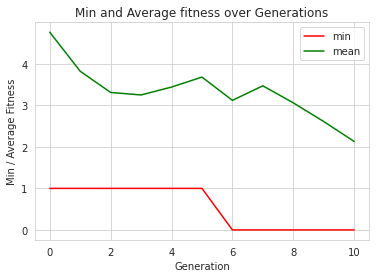

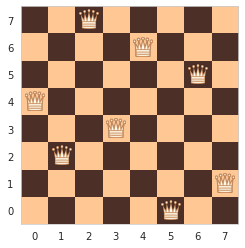

In [62]:
from deap import base
from deap import creator
from deap import tools

import random
import array

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# problem constants:
NUM_OF_QUEENS = 8

# Genetic Algorithm constants:
POPULATION_SIZE = 100
MAX_GENERATIONS = 10
HALL_OF_FAME_SIZE = 10
P_CROSSOVER = 0.8  # probability for crossover
P_MUTATION = 0.1   # probability for mutating an individual

# set the random seed for repeatable results
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

# create the desired N-
nQueens = NQueensProblem(NUM_OF_QUEENS)

toolbox = base.Toolbox()

# define a single objective, minimizing fitness strategy:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

# create the Individual class based on list of integers:
creator.create("Individual", array.array, typecode='i', fitness=creator.FitnessMin)

# create an operator that generates randomly shuffled indices:
toolbox.register("randomOrder", random.sample, range(len(nQueens)), len(nQueens))

# create the individual creation operator to fill up an Individual instance with shuffled indices:
toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.randomOrder)

# create the population creation operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)


# fitness calculation - compute the total distance of the list of cities represented by indices:
def getViolationsCount(individual):
    return nQueens.getViolationsCount(individual),  # return a tuple


toolbox.register("evaluate", getViolationsCount)


# Genetic operators:
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mate", tools.cxUniformPartialyMatched, indpb=2.0/len(nQueens))
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=1.0/len(nQueens))


# Genetic Algorithm flow:
def main():

    # create initial population (generation 0):
    population = toolbox.populationCreator(n=POPULATION_SIZE)

    # prepare the statistics object:
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", np.min)
    stats.register("avg", np.mean)

    # define the hall-of-fame object:
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    # perform the Genetic Algorithm flow with hof feature added:
    population, logbook = elitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                              ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)

    # print hall of fame members info:
    print("- Best solutions are:")
    for i in range(HALL_OF_FAME_SIZE):
        print(i, ": ", hof.items[i].fitness.values[0], " -> ", hof.items[i])

    # plot statistics:
    minFitnessValues, meanFitnessValues = logbook.select("min", "avg")
    plt.figure(1)
    sns.set_style("whitegrid")
    plt.plot(minFitnessValues, color='red', label='min')
    plt.plot(meanFitnessValues, color='green', label='mean')
    plt.xlabel('Generation')
    plt.ylabel('Min / Average Fitness')
    plt.title('Min and Average fitness over Generations')
    plt.legend()

    # plot best solution:
    sns.set_style("whitegrid", {'axes.grid' : False})
    nQueens.plotBoard(hof.items[0])

    # show both plots:
    plt.show()


if __name__ == "__main__":
    main()


## Ejercicio: Optimizar con dos diferentes número de reinas

## Optimización de funciones

In [68]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import minimize
import random


# Importamos los módulos relevantes de la libreria de algoritmos evolutivos 

from deap import base, creator, tools, algorithms

# Importamos este módulo independiente para implementar elitismo, adjunto en la carpeta fuente. 


In [64]:
def polynomial(x):
    y =  - x**6/60 - x**5/50 + x**4/2 + 2*x**3/3 - 3.2*x**2 - 6.4*x
    return -y

def rational(x):
    y = -(x**6 + x**5 - 10*x**2 - 10*x - 12)/(x**2 + 6)
    return y

def irrational(x):
    y = 5 - np.sqrt(x**4 + 2*x**3 - 3*x**2 + 13)
    return y

def trigonometric(x):
    y =  np.sin(3*x + 45)**2 + 0.9*np.sin(9*x)**3 - np.sin(15*x + 50) - np.cos(2*x - 30)
    return y

def asymptoteV(x):
    if -0.05 <= x <= 0.05:   # Para evitar la discontinuidad, definimos un valor "razonable"
        y = 0
    else:
        y = (np.sin(2*np.pi*x) - np.cos(3*np.pi*x))/x
    return y

def asymptoteH(x):
    if -0.05 <= x <= 0.05:  
        y = -16               # Para evitar la discontinuidad
    else:
        y = (2*x - 1)/(x**2)
    return y

def logarithmic(x):
    y = -x**4*(np.log(abs(x)) - 1)
    return y

def exponential(x):
    if -0.01 <= x <= 0.01:
        y = -10                 # Para evitar la discontinuidad
    else:
        y = np.exp(-x)*(np.log(abs(x)) + x/(abs(x)))
    return y

### Minimizar

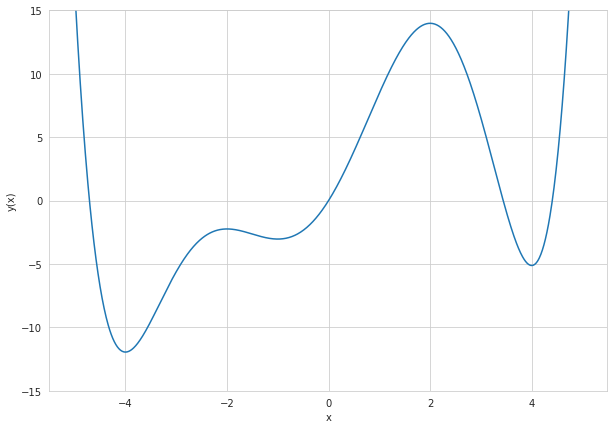

In [192]:
fun = np.vectorize(lambda x: polynomial(x)) # Elegir alguna función de arriba.
xs = np.arange(-5.0, 5.0, 0.01) # Ajustar el dominio de la función según se ve en el artículo

plt.figure(figsize=(10, 7))
plt.grid(True)
plt.xlabel("x")
plt.ylim(-15, 15) # Ajustar los límites para que luzca como en el artículo
plt.ylabel("y(x)")
plt.plot(xs, fun(xs))
plt.show()

In [193]:
# Constantes del problema:
DIMENSIONS = 1  # Número de dimensiones 
BOUND_LOW, BOUND_UP = -4.0, 4.0  # Ajustar los límites de la variable independiente
# Parámetros del algoritmo:
POPULATION_SIZE = 10 # A mayor cantidad, mejor desempeño pero mayor cómputo
P_CROSSOVER = 0.8  # Probabilidad de cruza: 0.8 es valor típico
P_MUTATION = 0.3   # Probabilidad de mutación individual, puede ser entre 0.1 y 0.5.
MAX_GENERATIONS = 50  # A mayor cantidad, mejor desempeño pero mayor cómputo
HALL_OF_FAME_SIZE = 1 # Cantidad de mejores individuos que pasan íntegramente a la siguiente generación 
CROWDING_FACTOR = 20.0  # factor no relevante en todas las técnicas
# Para fijar la población inicial:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
toolbox = base.Toolbox() # Herramienta estructural de DEAP
# Define la estrategia de optimización:
# creator.create("FitnessMax", base.Fitness, weights=(1.0,))  # Para hallar máximo
creator.create("FitnessMin", base.Fitness, weights=(-1.0,)) # Para hallar mínimo
# Crea la clase individuos:
#creator.create("Individual", list, fitness=creator.FitnessMax)
creator.create("Individual", list, fitness=creator.FitnessMin)


/home/isidro/.local/lib/python3.10/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/isidro/.local/lib/python3.10/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [194]:
# Crea poblaciones como números aleatorios distribuidos entre las mismas fronteras
def randomFloat(low, up):
    return [random.uniform(l, u) for l, u in zip([low] * DIMENSIONS, [up] * DIMENSIONS)]


In [195]:
# Crea un flotante a partir de lo anterior.
toolbox.register("attrFloat", randomFloat, BOUND_LOW, BOUND_UP)
# Crea un individo, a partir de lo anterior.
toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.attrFloat)
# Crea una población de individuos:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)
# Evalua la función elegida
toolbox.register("evaluate", fun) # Actualizar esta celda cada que se elija una nueva función

# Operadores genéticos:
toolbox.register("select", tools.selTournament, tournsize=2) # Selección por torneo de tamaño 2
toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=BOUND_LOW, up=BOUND_UP, eta=CROWDING_FACTOR)
toolbox.register("mutate", tools.mutPolynomialBounded, low=BOUND_LOW, up=BOUND_UP, 
                 eta=CROWDING_FACTOR, indpb=1.0/DIMENSIONS)

In [196]:
def main():

    # Crea la población inicial (generación 0):
    population = toolbox.populationCreator(n=POPULATION_SIZE)

    # Guarda datos estadísticos:
    stats = tools.Statistics(lambda ind: ind.fitness.values)
#    stats.register("max", np.max)   # Elegir cuando se busque maximizar
    stats.register("min", np.min)   # Elegir cuando se desee minimizar
    stats.register("avg", np.mean)

    # Define el Salón de la fama para implementar elitismo:
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    # Incorpora elitismo en el AG:
    population, logbook = elitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                              ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)

    # Imprime la mejor solución encontrada:
    best = hof.items[0]
    print("-- Best Individual = ", best)
    print("-- Best Fitness = ", best.fitness.values[0])
    print("- Best solutions are:")
    for i in range(HALL_OF_FAME_SIZE):
        print(i, ": ", hof.items[i].fitness.values[0], " -> ", hof.items[i])

    # Estrae los datos estadísticos:
    gen, avg, min_, max_ = logbook.select("gen", "avg", "min", "max")

    return population, logbook, hof

gen	nevals	min     	avg    
0  	10    	-11.4518	0.16872
1  	8     	-11.4518	-2.50659
2  	8     	-11.4518	-8.23564
3  	6     	-11.7581	-10.4657
4  	7     	-11.9199	-9.99041
5  	7     	-11.9217	-11.1027
6  	7     	-11.9401	-11.3981
7  	3     	-11.9463	-11.8544
8  	6     	-11.9464	-11.9073
9  	7     	-11.9466	-11.9429
10 	6     	-11.9466	-11.9459
11 	8     	-11.9466	-11.648 
12 	9     	-11.9466	-11.5332
13 	7     	-11.9467	-11.9466
14 	9     	-11.9467	-11.7472
15 	9     	-11.9467	-11.8636
16 	8     	-11.9467	-11.924 
17 	8     	-11.9467	-11.924 
18 	6     	-11.9467	-11.935 
19 	6     	-11.9467	-11.7819
20 	8     	-11.9467	-10.8527
21 	5     	-11.9467	-11.7336
22 	9     	-11.9467	-11.2393
23 	8     	-11.9467	-11.9467
24 	8     	-11.9467	-11.334 
25 	8     	-11.9467	-11.9454
26 	7     	-11.9467	-11.6833
27 	7     	-11.9467	-11.7006
28 	8     	-11.9467	-11.7735
29 	6     	-11.9467	-11.7267
30 	8     	-11.9467	-11.7713
31 	8     	-11.9467	-11.6759
32 	6     	-11.9467	-11.9457
33 	8     	-11.9

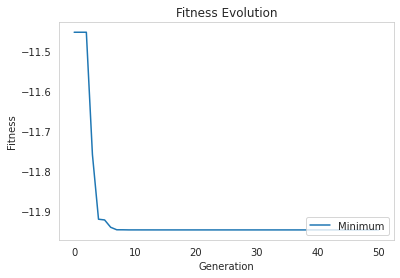

In [197]:
# Llama al flujo principal y muestra los resultados

if __name__ == "__main__":
    pop, log, hof = main()
    
    gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")
    
    best = hof.items[0]
    
    plt.figure()
    plt.plot(gen, min_, label="Minimum") # Elegir para mostrar la evolución del mejor fitness al minimizar
#    plt.plot(gen, max_, label="Maximum") # Elegir para mostrar la evolución del mejor fitness al maxmizar
#    plt.plot(gen, avg, label="Average") # Elegir para mostrar la evolución del promedio del fitness
    plt.title("Fitness Evolution")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend(loc="lower right")
    plt.show()

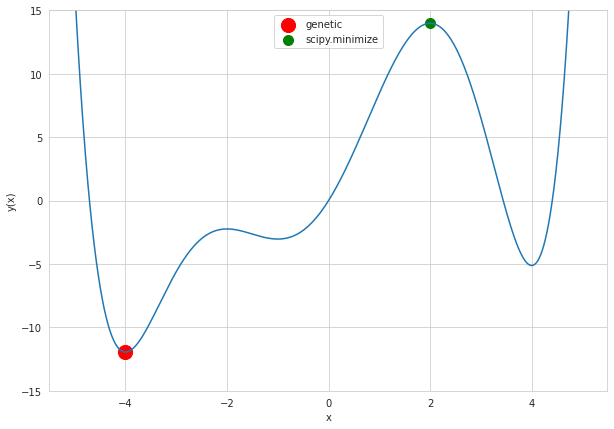

In [199]:
xs = np.arange(-5.0, 5.0, 0.01) # Ajustar el dominio de la función según se ve en el artículo

plt.figure(figsize=(10, 7))
plt.grid(True)
plt.scatter(best[0], fun(best[0]), c='red', marker='o', s=200, label='genetic')

######## Comparación con scipy.minimize 
x0 = 2 # Este valor inicial se puede modificar. Se sugiere cambiarlo para experimentar.
result = minimize(fun, x0, bounds = [(-5., 5.)]) # Ajustar los límites, según la función a trabajar.
x_min_scipy = result.x
y_min_scipy = result.fun

plt.scatter(x_min_scipy, y_min_scipy, c='green', marker='o', s=100, label='scipy.minimize')
plt.xlabel("x")
plt.ylim(-15, 15) # Ajustar los límites para que luzca como en el artículo
plt.ylabel("y(x)")
plt.plot(xs, fun(xs))
plt.legend(loc="upper center")
plt.show()

## Maximizar función

Vamos a minimizar el negativo de la función original

In [227]:
fun = np.vectorize(lambda x: -1*rational(x)) # Elegir alguna función de arriba.
fun_or = np.vectorize(lambda x: rational(x)) # Elegir alguna función de arriba.

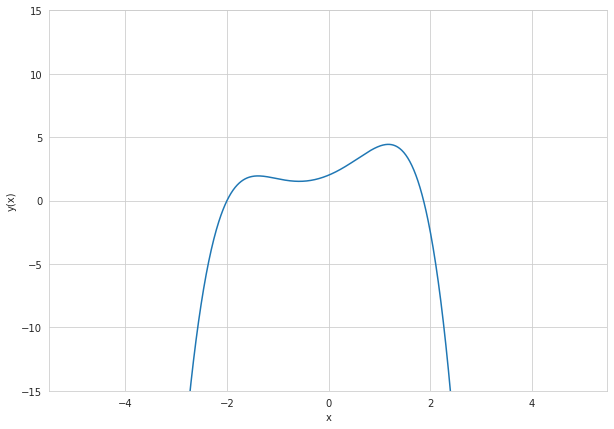

In [228]:
xs = np.arange(-5.0, 5.0, 0.01) # Ajustar el dominio de la función según se ve en el artículo

plt.figure(figsize=(10, 7))
plt.grid(True)
plt.xlabel("x")
plt.ylim(-15, 15) # Ajustar los límites para que luzca como en el artículo
plt.ylabel("y(x)")
plt.plot(xs, fun_or(xs))
plt.show()

In [202]:
# Constantes del problema:
DIMENSIONS = 1  # Número de dimensiones 
BOUND_LOW, BOUND_UP = -4.0, 4.0  # Ajustar los límites de la variable independiente

In [247]:
# Parámetros del algoritmo:
POPULATION_SIZE = 100 # A mayor cantidad, mejor desempeño pero mayor cómputo
P_CROSSOVER = 0.8  # Probabilidad de cruza: 0.8 es valor típico
P_MUTATION = 0.3   # Probabilidad de mutación individual, puede ser entre 0.1 y 0.5.
MAX_GENERATIONS = 500  # A mayor cantidad, mejor desempeño pero mayor cómputo
HALL_OF_FAME_SIZE = 1 # Cantidad de mejores individuos que pasan íntegramente a la siguiente generación 
CROWDING_FACTOR = 20.0  # factor no relevante en todas las técnicas

In [248]:
# Para fijar la población inicial:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

In [249]:
toolbox = base.Toolbox() # Herramienta estructural de DEAP

In [250]:
# Define la estrategia de optimización:
# creator.create("FitnessMax", base.Fitness, weights=(1.0,))  # Para hallar máximo
creator.create("FitnessMin", base.Fitness, weights=(-1.0,)) # Para hallar mínimo

/home/isidro/.local/lib/python3.10/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [251]:
# Crea la clase individuos:
#creator.create("Individual", list, fitness=creator.FitnessMax)
creator.create("Individual", list, fitness=creator.FitnessMin)

/home/isidro/.local/lib/python3.10/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [252]:
# Crea poblaciones como números aleatorios distribuidos entre las mismas fronteras
def randomFloat(low, up):
    return [random.uniform(l, u) for l, u in zip([low] * DIMENSIONS, [up] * DIMENSIONS)]

In [253]:
# Crea un flotante a partir de lo anterior.
toolbox.register("attrFloat", randomFloat, BOUND_LOW, BOUND_UP)

In [254]:
# Crea un individo, a partir de lo anterior.
toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.attrFloat)

In [255]:
# Crea una población de individuos:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

In [256]:
# Evalua la función elegida
toolbox.register("evaluate", fun) # Actualizar esta celda cada que se elija una nueva función

In [257]:
# Operadores genéticos:
toolbox.register("select", tools.selTournament, tournsize=2) # Selección por torneo de tamaño 2
toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=BOUND_LOW, up=BOUND_UP, eta=CROWDING_FACTOR)
toolbox.register("mutate", tools.mutPolynomialBounded, low=BOUND_LOW, up=BOUND_UP, 
                 eta=CROWDING_FACTOR, indpb=1.0/DIMENSIONS)

In [258]:
def main():

    # Crea la población inicial (generación 0):
    population = toolbox.populationCreator(n=POPULATION_SIZE)

    # Guarda datos estadísticos:
    stats = tools.Statistics(lambda ind: ind.fitness.values)
#    stats.register("max", np.max)   # Elegir cuando se busque maximizar
    stats.register("min", np.min)   # Elegir cuando se desee minimizar
    stats.register("avg", np.mean)

    # Define el Salón de la fama para implementar elitismo:
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    # Incorpora elitismo en el AG:
    population, logbook = elitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                              ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)

    # Imprime la mejor solución encontrada:
    best = hof.items[0]
    print("-- Best Individual = ", best)
    print("-- Best Fitness = ", best.fitness.values[0])
    print("- Best solutions are:")
    for i in range(HALL_OF_FAME_SIZE):
        print(i, ": ", hof.items[i].fitness.values[0], " -> ", hof.items[i])

    # Estrae los datos estadísticos:
    gen, avg, min_, max_ = logbook.select("gen", "avg", "min", "max")

    return population, logbook, hof

gen	nevals	min     	avg    
0  	100   	-4.42817	29.4279
1  	81    	-4.42817	5.33801
2  	85    	-4.4284 	-0.772943
3  	90    	-4.4284 	-3.01003 
4  	88    	-4.42842	-3.60709 
5  	89    	-4.42848	-3.90167 
6  	82    	-4.42848	-3.93044 
7  	88    	-4.42848	-4.21035 
8  	87    	-4.42848	-3.53088 
9  	93    	-4.42848	-3.95132 
10 	86    	-4.42849	-3.72247 
11 	90    	-4.42849	-4.318   
12 	87    	-4.42849	-3.46794 
13 	88    	-4.42849	-3.80409 
14 	87    	-4.42849	-4.112   
15 	90    	-4.42849	-3.90809 
16 	75    	-4.42849	-3.76731 
17 	83    	-4.42849	-3.77596 
18 	92    	-4.42849	-3.82511 
19 	83    	-4.42849	-3.48279 
20 	62    	-4.42849	-4.22898 
21 	86    	-4.42849	-4.01926 
22 	82    	-4.42849	-4.04736 
23 	80    	-4.42849	-3.73288 
24 	83    	-4.42849	-4.07689 
25 	81    	-4.42849	-4.07078 
26 	86    	-4.42849	-3.49574 
27 	90    	-4.42849	-4.0578  
28 	90    	-4.42849	-4.189   
29 	85    	-4.42849	-3.67918 
30 	93    	-4.42849	-3.90148 
31 	80    	-4.42849	-4.05721 
32 	85    	-4.42

430	74    	-4.42849	-3.48552 
431	78    	-4.42849	-4.17701 
432	84    	-4.42849	-3.6055  
433	82    	-4.42849	-3.12236 
434	90    	-4.42849	-3.96458 
435	79    	-4.42849	-3.12271 
436	82    	-4.42849	-3.45923 
437	85    	-4.42849	-3.93464 
438	86    	-4.42849	-4.12918 
439	85    	-4.42849	-3.75281 
440	92    	-4.42849	-4.08551 
441	82    	-4.42849	-3.99182 
442	78    	-4.42849	-2.35819 
443	88    	-4.42849	-4.04657 
444	80    	-4.42849	-3.27545 
445	91    	-4.42849	-3.91255 
446	84    	-4.42849	-4.11699 
447	77    	-4.42849	-3.59745 
448	81    	-4.42849	-4.00326 
449	81    	-4.42849	-4.03859 
450	88    	-4.42849	-4.07136 
451	84    	-4.42849	-4.05678 
452	88    	-4.42849	-3.47818 
453	87    	-4.42849	-4.26441 
454	88    	-4.42849	-4.14725 
455	72    	-4.42849	-3.81491 
456	90    	-4.42849	-3.82825 
457	84    	-4.42849	-4.11593 
458	88    	-4.42849	-4.17532 
459	88    	-4.42849	-4.10296 
460	82    	-4.42849	-4.23608 
461	79    	-4.42849	-2.83694 
462	85    	-4.42849	-3.61047 
463	85    

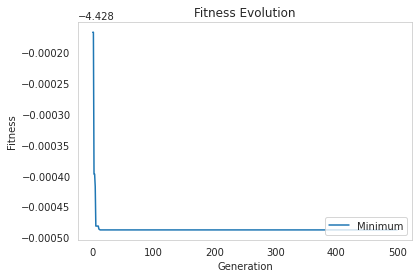

In [259]:
# Llama al flujo principal y muestra los resultados

if __name__ == "__main__":
    pop, log, hof = main()
    
    gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")
    
    best = hof.items[0]
    
    plt.figure()
    plt.plot(gen, min_, label="Minimum") # Elegir para mostrar la evolución del mejor fitness al minimizar
#    plt.plot(gen, max_, label="Maximum") # Elegir para mostrar la evolución del mejor fitness al maxmizar
#    plt.plot(gen, avg, label="Average") # Elegir para mostrar la evolución del promedio del fitness
    plt.title("Fitness Evolution")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend(loc="lower right")
    plt.show()

Multiplicamos soluciones por -1, para recuperar los valores de la función original

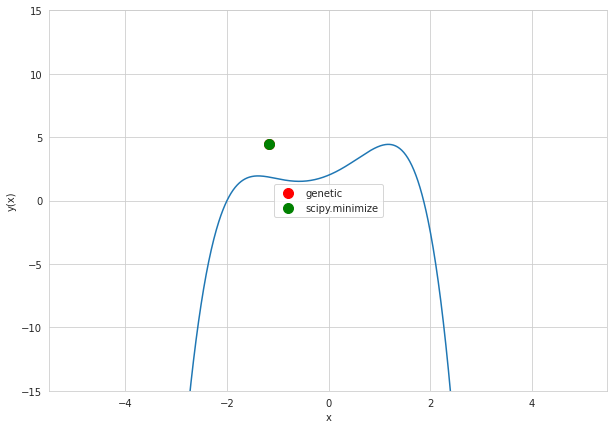

In [263]:
xs = np.arange(-5.0, 5.0, 0.01) # Ajustar el dominio de la función según se ve en el artículo

plt.figure(figsize=(10, 7))
plt.grid(True)
plt.scatter(-1*best[0], -1*fun(best[0]), c='red', marker='o', s=100, label='genetic')

######## Comparación con scipy.minimize 
x0 = -2 # Este valor inicial se puede modificar. Se sugiere cambiarlo para experimentar.
result = minimize(fun, x0, bounds = [(-5., 5.)]) # Ajustar los límites, según la función a trabajar.
x_min_scipy = result.x
y_min_scipy = result.fun

plt.scatter(-1*x_min_scipy, -1*y_min_scipy, c='green', marker='o', s=100, label='scipy.minimize')
plt.xlabel("x")
plt.ylim(-15, 15) # Ajustar los límites para que luzca como en el artículo
plt.ylabel("y(x)")
plt.plot(xs, fun_or(xs))
plt.legend(loc="center")
plt.show()

## Ejercicio: Optimizar otras dos funciones

### Ejercicio: Describe el flujo general de un algoritmo genético implementado con la librería DEAP.